In [1]:
import numpy as np
import matplotlib.pyplot as plt

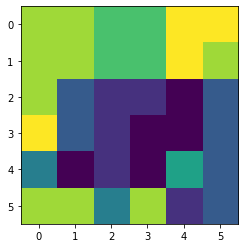

In [2]:
data = np.array([
    [6,6,5,5,7,7],
    [6,6,5,5,7,6],
    [6,2,1,1,0,2],
    [7,2,1,0,0,2],
    [3,0,1,0,4,2],
    [6,6,3,6,1,2]])

plt.imshow(data)

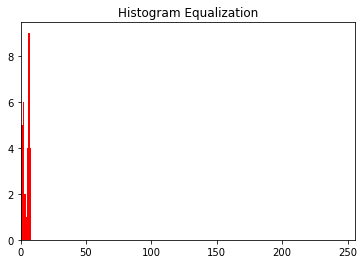

In [3]:
plt.hist(data.flatten(),256,[0,256], color = 'red')
plt.xlim([0,256])
plt.title("Histogram Equalization")
plt.show()

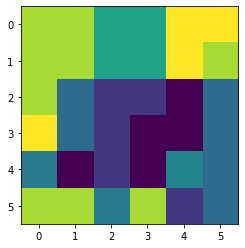

In [4]:
#Ambil data histogram
hist,bins = np.histogram(data, 256, [0,256])

#Proses
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
gambar = cdf[data]

#PlottingGambar
plt.imshow(gambar)

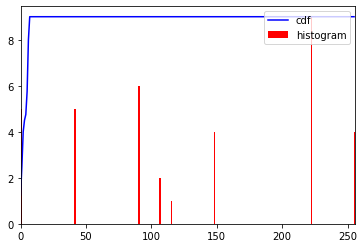

In [5]:
#hasil histogram equalization
plt.plot(cdf_normalized, color='blue')
plt.hist(gambar.flatten(), 256, [0,256], color='red')
plt.xlim([0,256])
plt.legend(('cdf', 'histogram'), loc= 'upper right')
plt.show()

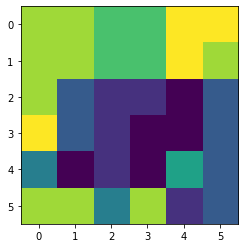

In [6]:
data = np.array([
    [6,6,5,5,7,7],
    [6,6,5,5,7,6],
    [6,2,1,1,0,2],
    [7,2,1,0,0,2],
    [3,0,1,0,4,2],
    [6,6,3,6,1,2]])

definisiSpesifikasi=[
                    [0,5],
                    [1,5],
                    [2,10],
                    [3,15],
                    [4,20],
                    [5,25],
                    [6,15],
                    [7,5],
                ]

tabel1 = []
length_table = data.shape[0] * data.shape[1]
for i in data.flatten():
    if not i in tabel1:
        tabel1.append([i])
tabel1.sort()

#kolom 2
for i in range(0,len(tabel1)):
    a = list(data.flatten())
    new_value = [tabel1[i], a.count(tabel1[i])]
    tabel1[i] = new_value

#kolom 3
for i in range(0,len(tabel1)):
    px = 0
    for j in range(0,i+1):
        px += tabel1[j][1]
    pxudu = px / length_table
    new_value = tabel1[i] + [pxudu]
    tabel1[i] = new_value

#Plotting gambar Awal Equalization Spesification
plt.imshow(data)

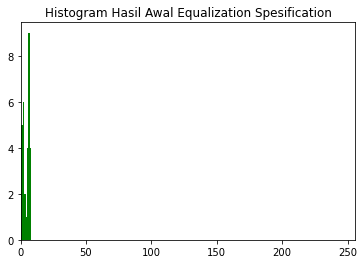

In [8]:
#Plotting histogram Awal Equalization Spesification
plt.hist(data.flatten(),256,[0,256], color = 'green')
plt.xlim([0,256])
plt.title("Histogram Hasil Awal Equalization Spesification")
plt.show()

In [9]:
tabel2 = []
#kolom 1 dan 2
for i in range(0,len(definisiSpesifikasi)):
    z = definisiSpesifikasi[i][0]
    pz = definisiSpesifikasi[i][1]/100
    tabel2.append([z,pz])

#kolom 3
for i in range(0, len(tabel2)):
    pzudu = 0
    for j in range(0,i+1):
        pzudu += tabel2[j][1]
    tabel2[i] = tabel2[i] + [pzudu]

In [10]:
tabel3 = []
for i in data.flatten():
    if not i in tabel3:
        tabel3.append([i])
tabel3.sort()

In [11]:
for i in range(0,len(tabel1)):
    kiri = tabel1[i][2]
    cari_terdekat = tabel2[np.abs(np.asarray([a[2] for a in tabel2])-kiri).argmin()]
    kanan = cari_terdekat[2]
    z = cari_terdekat[0]
    tengah = str(kiri) + ' = ' + str(kanan) 
    new_value = [tabel3[i], tengah, z] 
    tabel3[i] = new_value

In [12]:
esDataAkhir = np.array(data[:])
for i in range(0,len(esDataAkhir)):
    for j in range(0, len(esDataAkhir[i])):
        index = -1;
        for jj in range(0,len(tabel3)):
            if esDataAkhir[i][j] == tabel3[jj][0]:
                index = jj
        esDataAkhir[i][j] = tabel3[index][2]

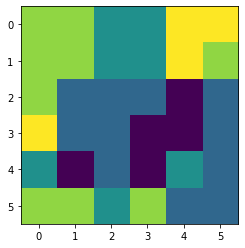

In [13]:
#Plotting gambar Akhir Equalization Spesification
plt.imshow(esDataAkhir)

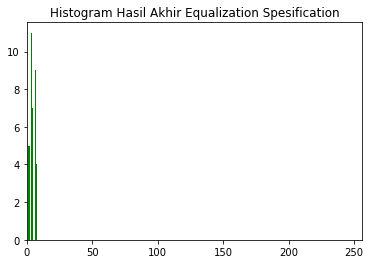

In [14]:
plt.hist(esDataAkhir.flatten(),256,[0,256], color = 'green')
plt.xlim([0,256])
plt.title("Histogram Hasil Akhir Equalization Spesification")
plt.show()